In [95]:
import matplotlib.pyplot as plt
import glob
import astropy
import importlib
import numpy as np
import pandas as pd
import datetime
from astropy.time import Time

from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry
from reduct_funcs import funcs_light_curve_cleaned

importlib.reload(funcs_light_curve_cleaned)
importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

<module 'reduct_funcs.funcs_polarimetry' from 'D:\\space_stuff\\optical_polarimetry\\Suhora_polarimety\\reduct_funcs\\funcs_polarimetry.py'>

In [19]:
#2014 data
x = glob.glob('./additional_data_2014/*')
df = pd.read_csv(x[0], sep='\t', header=0)

#My Data
file_obs = glob.glob("./list_data_files/*")
for k in range(0, len(file_obs)):
    print(k, file_obs[k])
    
print("\n")
data_323739 = funcs_utils.list_autoloader(file_obs[0],
                                         verbose_file=False)

data_g191b2b= funcs_utils.list_autoloader(file_obs[6],
                                         verbose_file=False)

data_hd212311= funcs_utils.list_autoloader(file_obs[9],
                                         verbose_file=False)

data_hd215806= funcs_utils.list_autoloader(file_obs[11],
                                         verbose_file=False)

data_bd64106= funcs_utils.list_autoloader(file_obs[2],
                                         verbose_file=False)

data_EECep = funcs_utils.list_autoloader(file_obs[4],
                                         verbose_file=False)

0 ./list_data_files\BD323739.txt
1 ./list_data_files\BD323739_sub.txt
2 ./list_data_files\BD64106.txt
3 ./list_data_files\BD84058.txt
4 ./list_data_files\EE_Cep.txt
5 ./list_data_files\flptest_a.txt
6 ./list_data_files\g191b2b.txt
7 ./list_data_files\g191b2b_old.txt
8 ./list_data_files\HD204827.txt
9 ./list_data_files\HD212311.txt
10 ./list_data_files\HD212311_sub.txt
11 ./list_data_files\HD215806.txt
12 ./list_data_files\HD215806_sub.txt
13 ./list_data_files\OJ287.txt




In [20]:
data_PD_eecep = funcs_polarimetry.calc_PD_stability(data_EECep, 
                                           perc_arg=True)

data_PA_eecep = funcs_polarimetry.calc_PA_stability(data_EECep, 
                                           deg_arg=True)

Calculate and return polarization degree (PD) for duration 2020-03-05 19:32:15.755000 to 2022-08-02 23:51:04.425000 
for eecep
Calculate and return position angle (PA) for duration 2020-03-05 19:32:15.755000 to 2022-08-02 23:51:04.425000 
for eecep


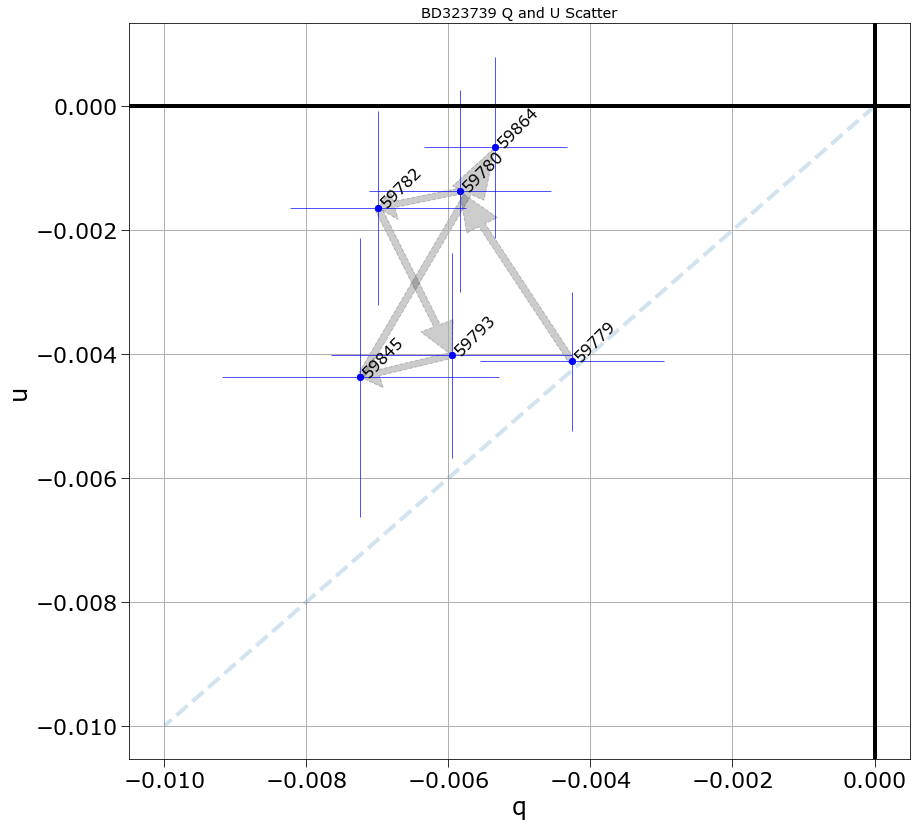

In [96]:
means = funcs_polarimetry.q_n_u_single_plot_v1(data_323739 ,
                                       plot_c='blue',
                                       in_title = 'BD323739',
                                       sv_im='./imgs/BD323739quscatter',
                                       reflection_axis='neg',
                                       time_ord=True,
                                       only_means=True,
                                       verbose_MJD_arg=True,
                                       pol_deg=False)

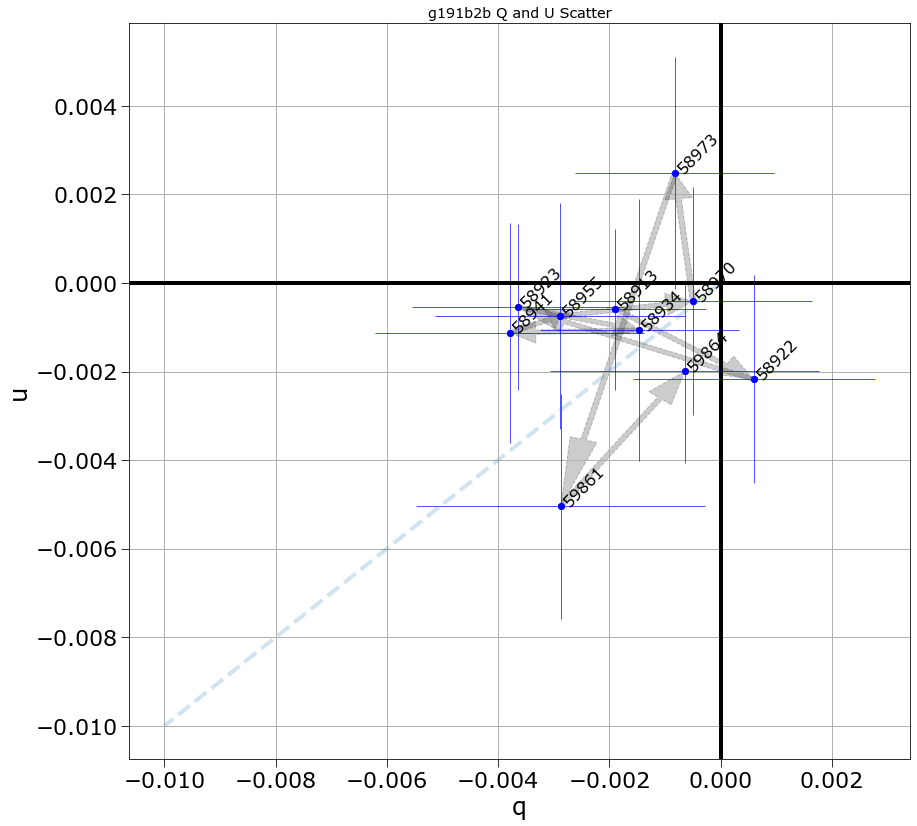

Calculate and plot polarization degree for 1 inputs without returning data.
Data 1 has length 10


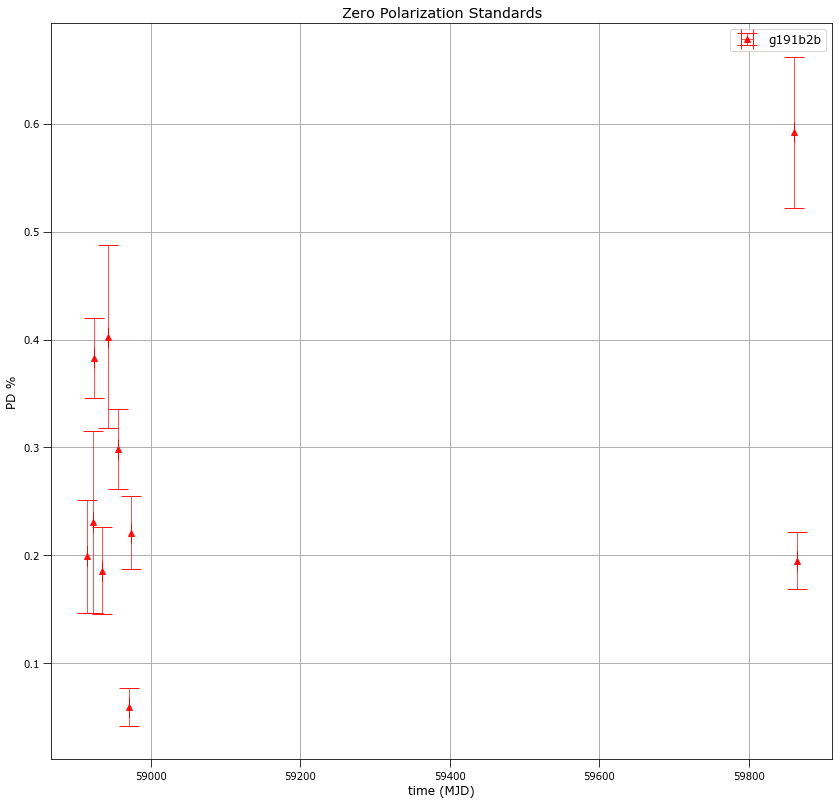

In [103]:
#Investigate g191b2b. Why the stability so bad?
means = funcs_polarimetry.q_n_u_single_plot_v1(np.array(data_g191b2b)[:,:] ,
                                       plot_c='blue',
                                       in_title = 'g191b2b',
                                       sv_im='./imgs/g191b2bquscatter',
                                       reflection_axis='neg',
                                       time_ord=True,
                                       only_means=True,
                                       verbose_MJD_arg=True,
                                       pol_deg=False)

funcs_polarimetry.calc_pd2([np.array(data_g191b2b)],
                           plot_legend=['g191b2b'],
                           plot_title='Zero Polarization Standards',
                           sv_pold_img='./imgs/ZeroPolg191b2bPDs',
                           perc_arg=True, 
                           verbose_calc_pd=False,
                           verbose_data=False)

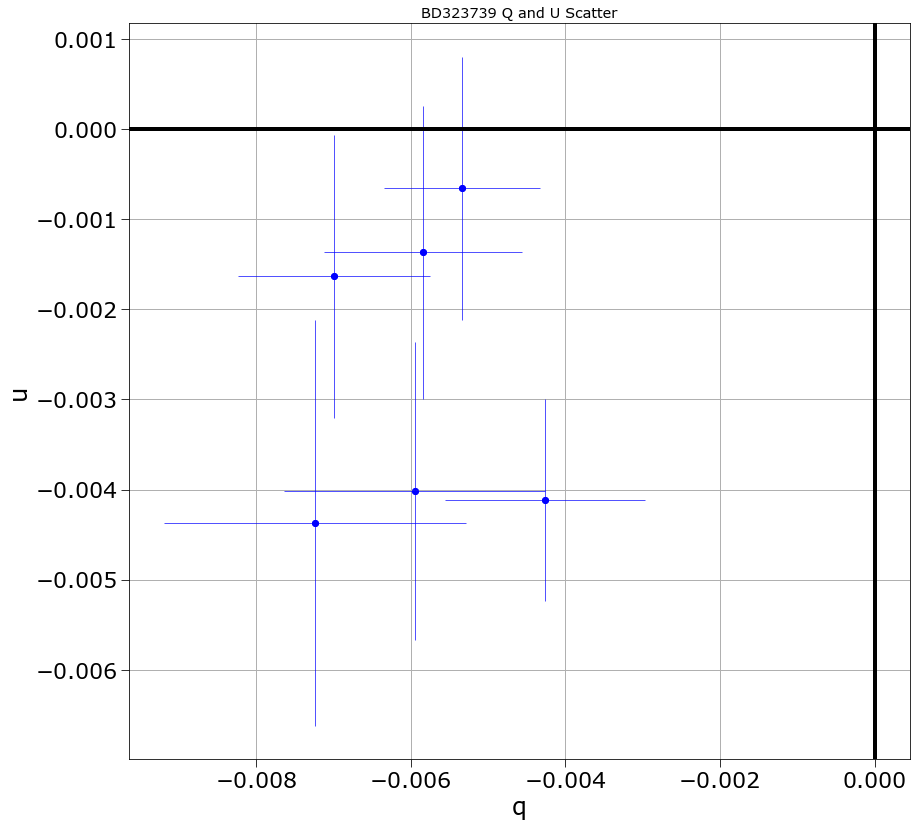

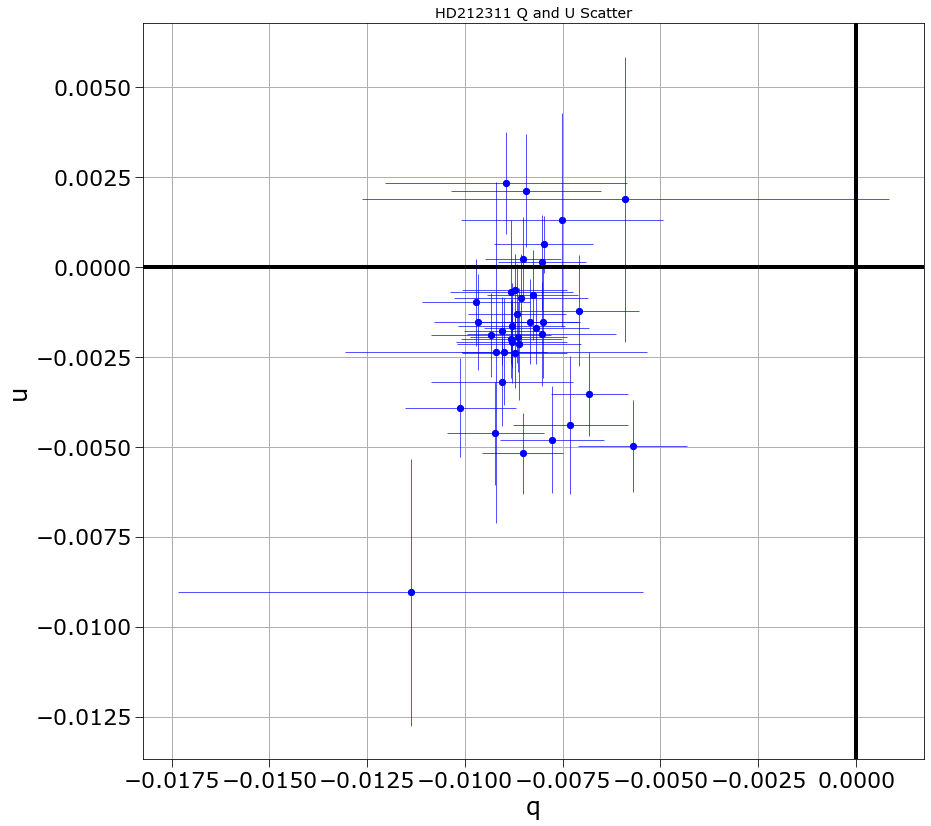

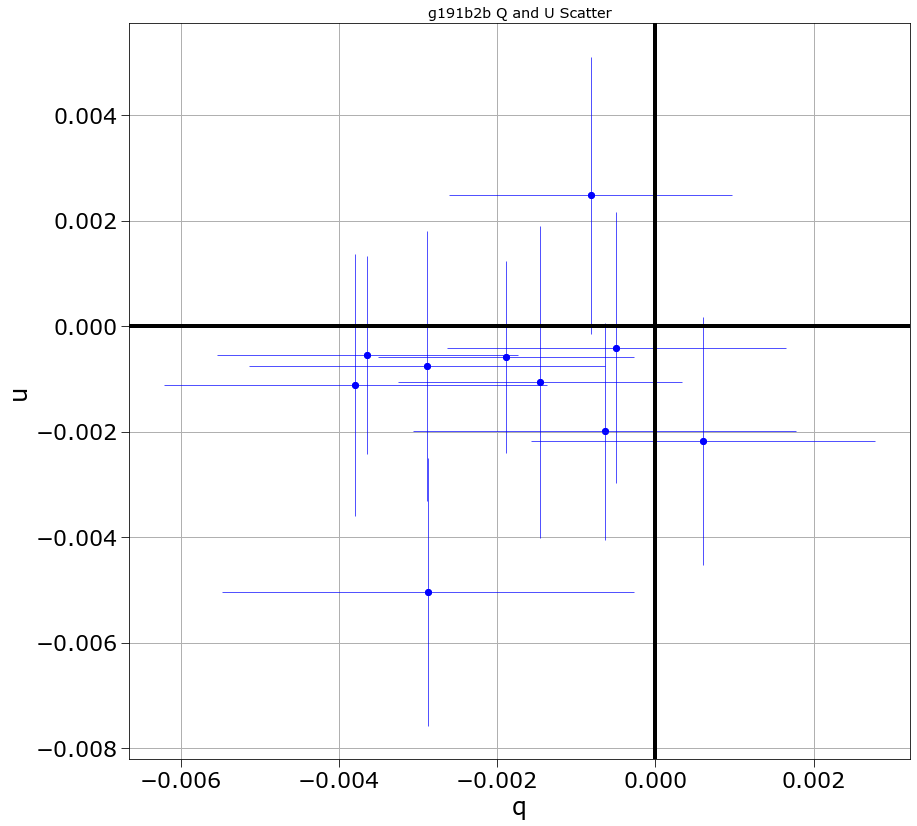

In [213]:
#This was after

#New Zero Pol
means = funcs_polarimetry.q_n_u_single_plot_v1(data_323739 ,
                                       plot_c='blue',
                                       in_title = 'BD323739',
                                       sv_im='./imgs/BD323739quscatter',
                                       only_means=True,
                                       verbose_MJD_arg=False,
                                       pol_deg=False)

means = funcs_polarimetry.q_n_u_single_plot_v1(np.array(data_hd212311),
                                       plot_c='blue',
                                       in_title = 'HD212311',
                                       sv_im='./imgs/HD212311quscatter',
                                       only_means=True,
                                       verbose_MJD_arg=False,
                                       pol_deg=False)

means = funcs_polarimetry.q_n_u_single_plot_v1(np.array(data_g191b2b),
                                       plot_c='blue',
                                       in_title = 'g191b2b',
                                       sv_im='./imgs/g191b2bquscatter',
                                       only_means=True,
                                       verbose_MJD_arg=False,
                                       pol_deg=False)

In [207]:
#Drop 33 off the load
data_hd215806[0]= np.delete(data_hd215806[0], [33])
data_hd215806[1]= np.delete(data_hd215806[1], [33])

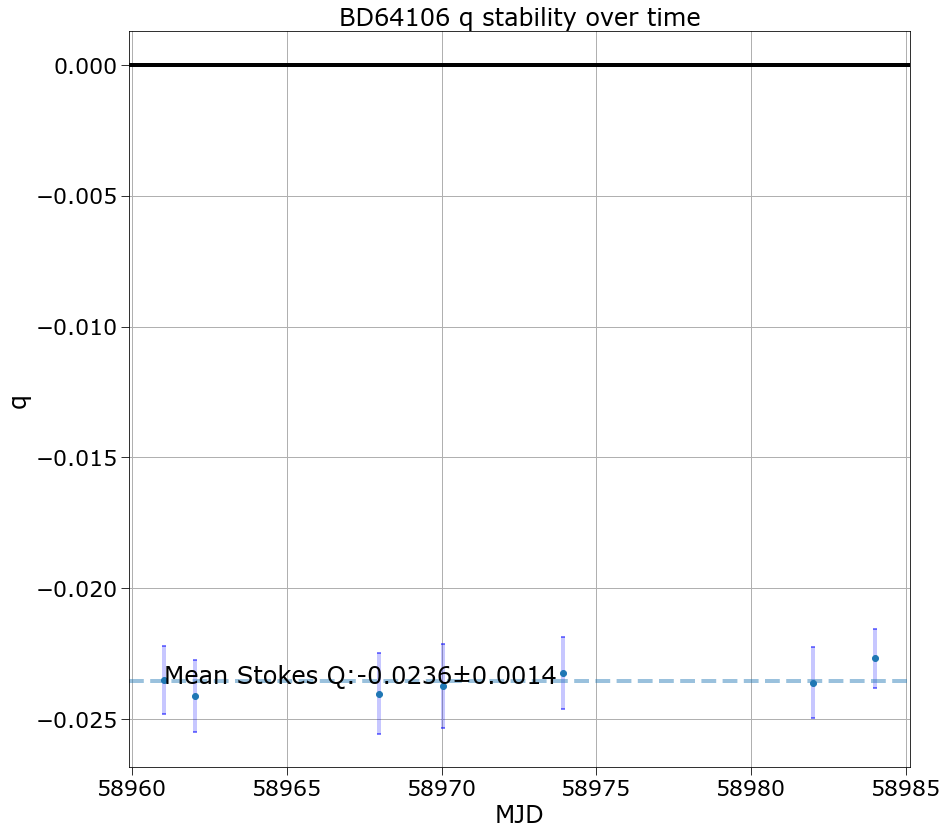

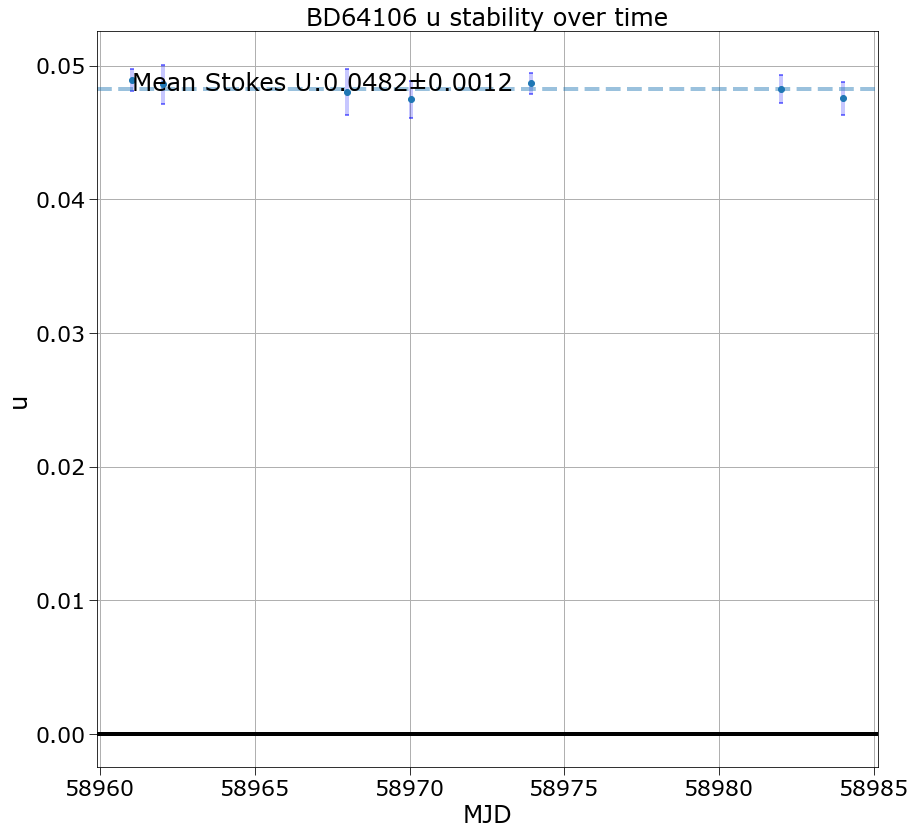

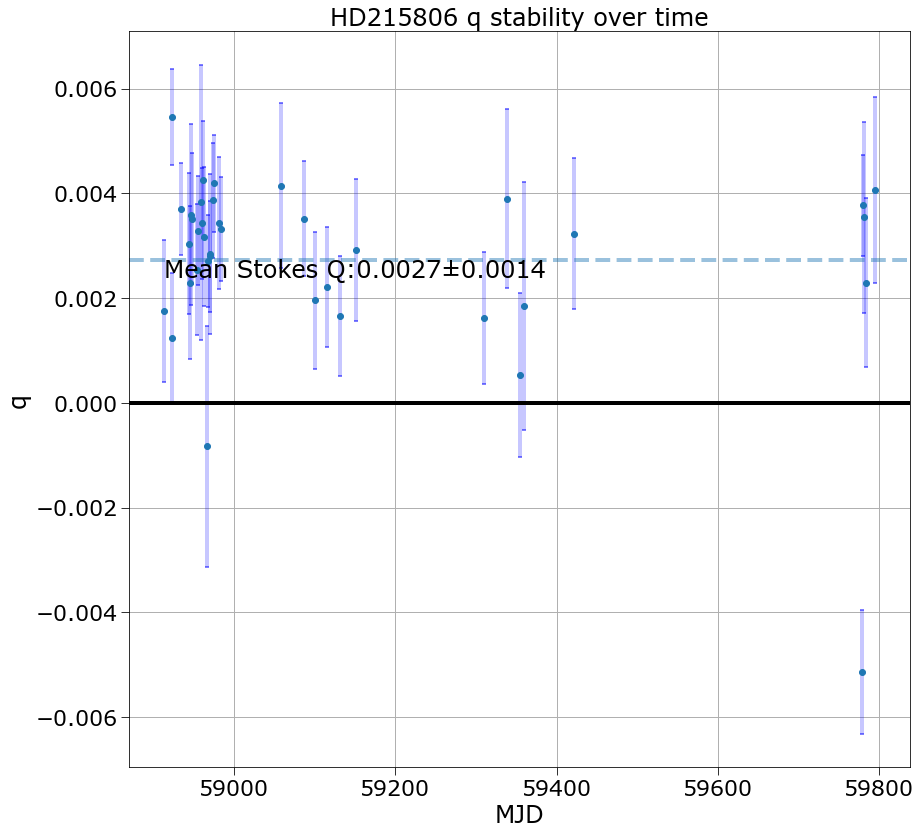

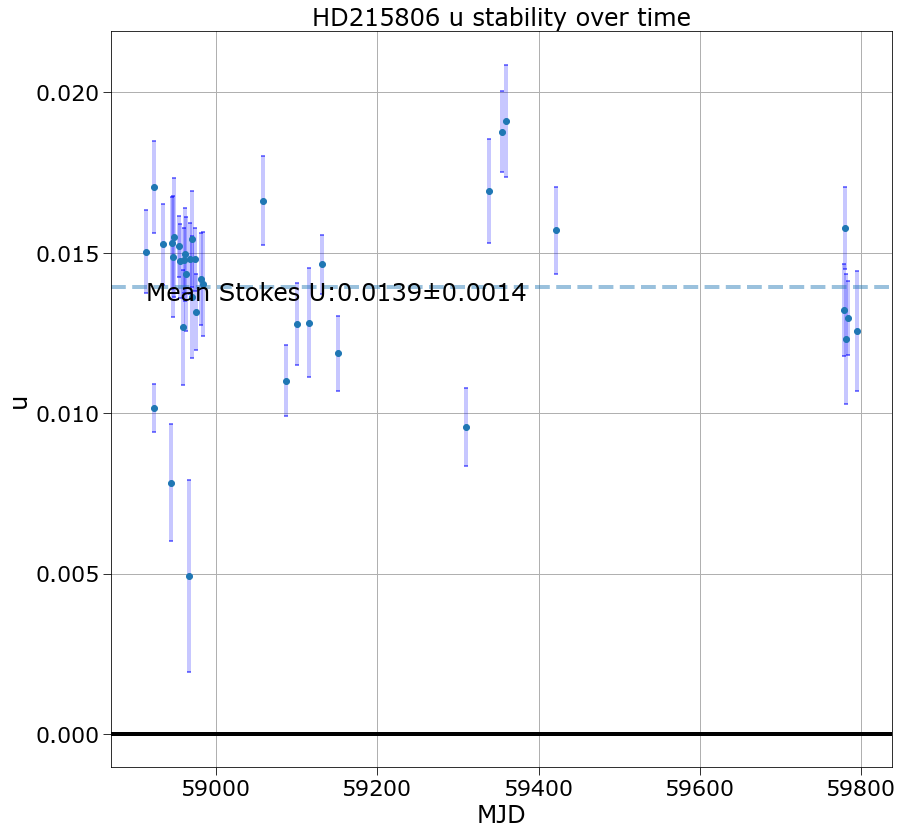

In [210]:
#High Pol Q and Us
mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_bd64106, q_u_check='q', 
                                                          in_title = 'BD64106',
                                                          sv_im='./imgs/BD64106qstabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

mean_u, mean_u_err = funcs_polarimetry.plot_q_u_stability(data_bd64106, q_u_check='u', 
                                                          in_title = 'BD64106',
                                                          sv_im='./imgs/BD64106ustabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_hd215806, q_u_check='q', 
                                                          in_title = 'HD215806',
                                                          sv_im='./imgs/HD215806qstabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

mean_u, mean_u_err = funcs_polarimetry.plot_q_u_stability(data_hd215806, q_u_check='u', 
                                                          in_title = 'HD215806',
                                                          sv_im='./imgs/HD215806ustabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

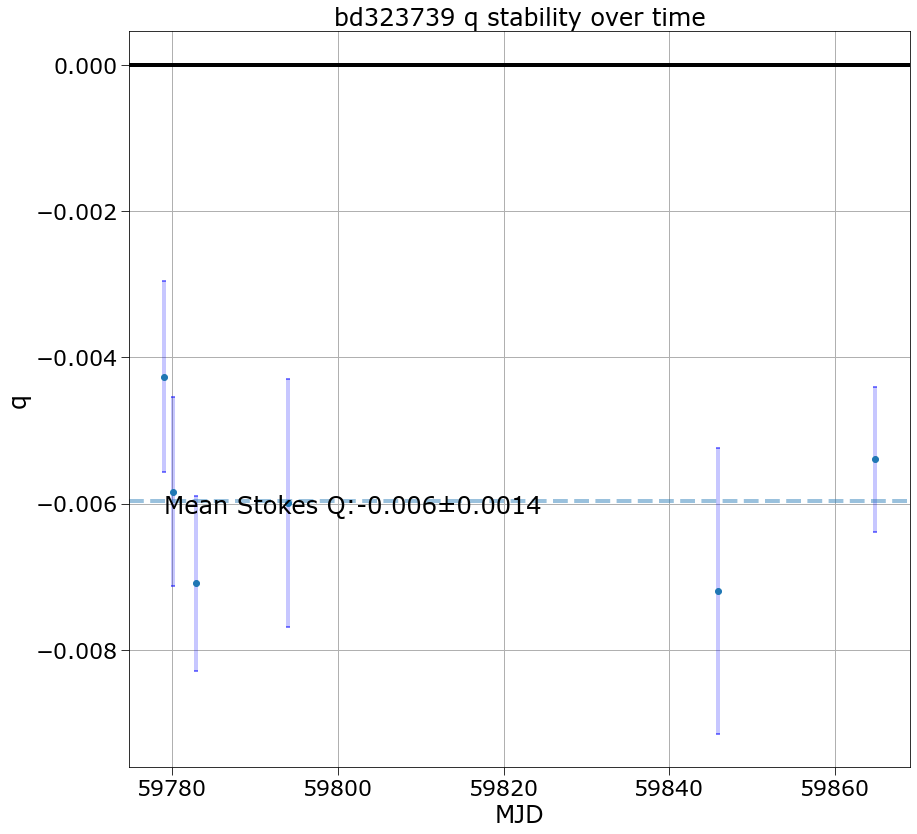

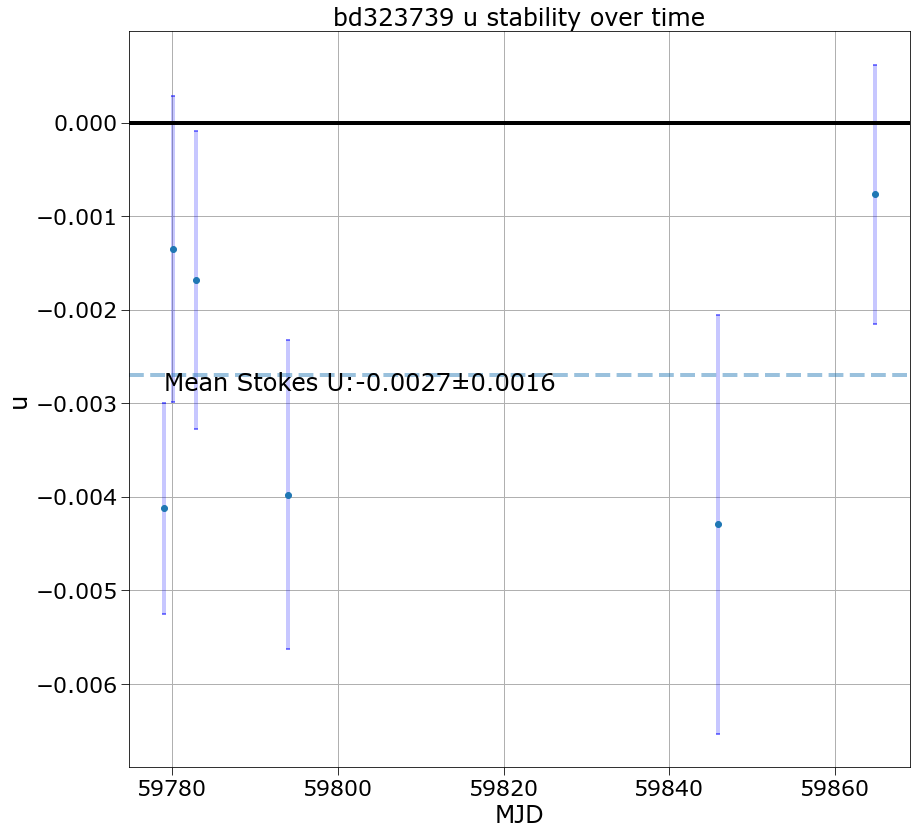

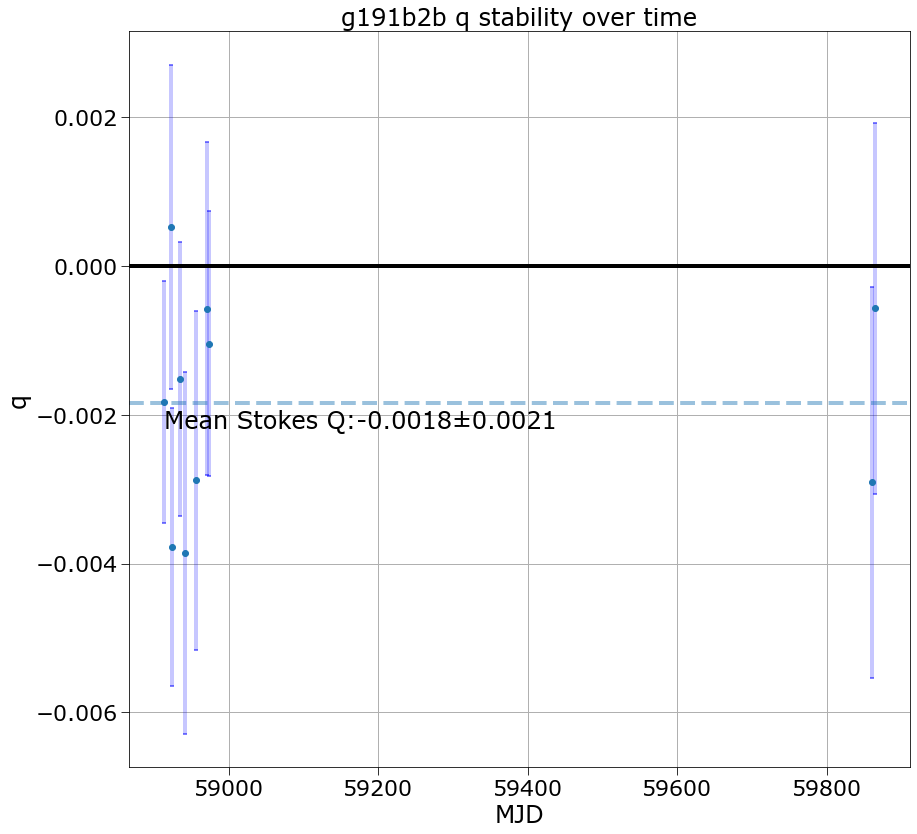

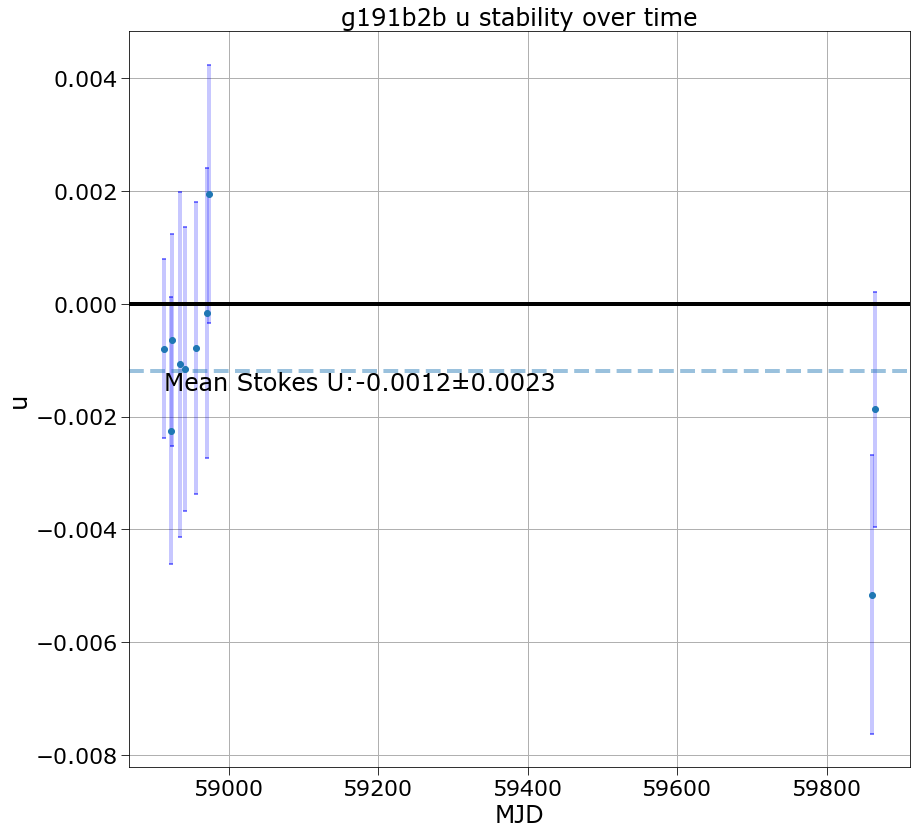

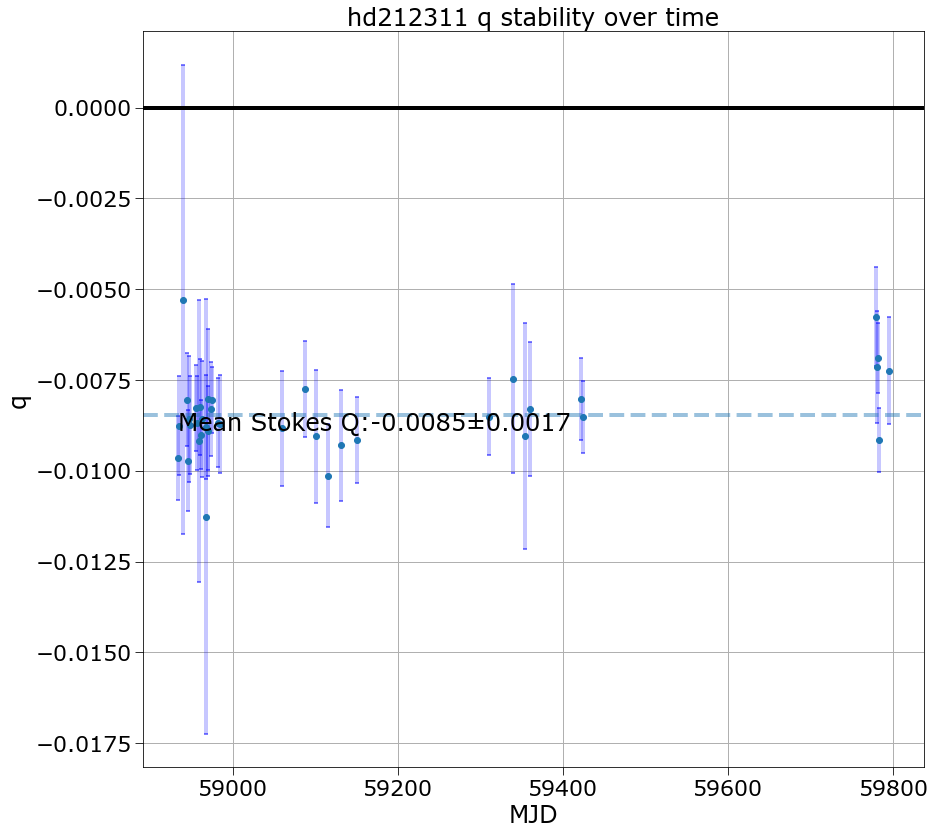

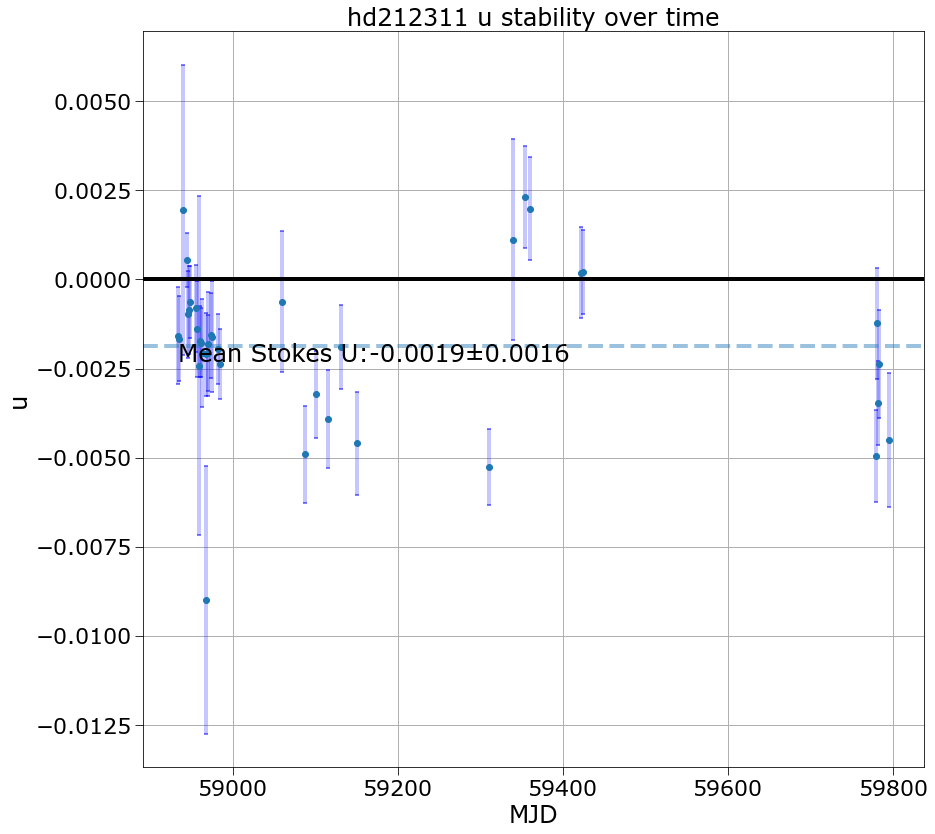

In [4]:
#Zero Pol Q and Us
mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_323739, q_u_check='q', 
                                                          in_title = 'bd323739',
                                                          sv_im='./imgs/bd323739bqstabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

mean_u, mean_u_err = funcs_polarimetry.plot_q_u_stability(data_323739, q_u_check='u', 
                                                          in_title = 'bd323739',
                                                          sv_im='./imgs/bd323739bustabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_g191b2b, q_u_check='q', 
                                                          in_title = 'g191b2b',
                                                          sv_im='./imgs/g191b2bqstabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

mean_u, mean_u_err = funcs_polarimetry.plot_q_u_stability(data_g191b2b, q_u_check='u', 
                                                          in_title = 'g191b2b',
                                                          sv_im='./imgs/g191b2bustabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

mean_q, mean_q_err = funcs_polarimetry.plot_q_u_stability(data_hd212311, q_u_check='q', 
                                                          in_title = 'hd212311',
                                                          sv_im='./imgs/hd212311qstabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

mean_u, mean_u_err = funcs_polarimetry.plot_q_u_stability(data_hd212311, q_u_check='u', 
                                                          in_title = 'hd212311',
                                                          sv_im='./imgs/hd212311ustabvtime',
                                                          verbose=False,
                                                          m_plot=True, 
                                                          plot_verbose=False)

Calculate and plot polarization degree for 2 inputs without returning data.
Data 1 has length 7
Data 2 has length 38


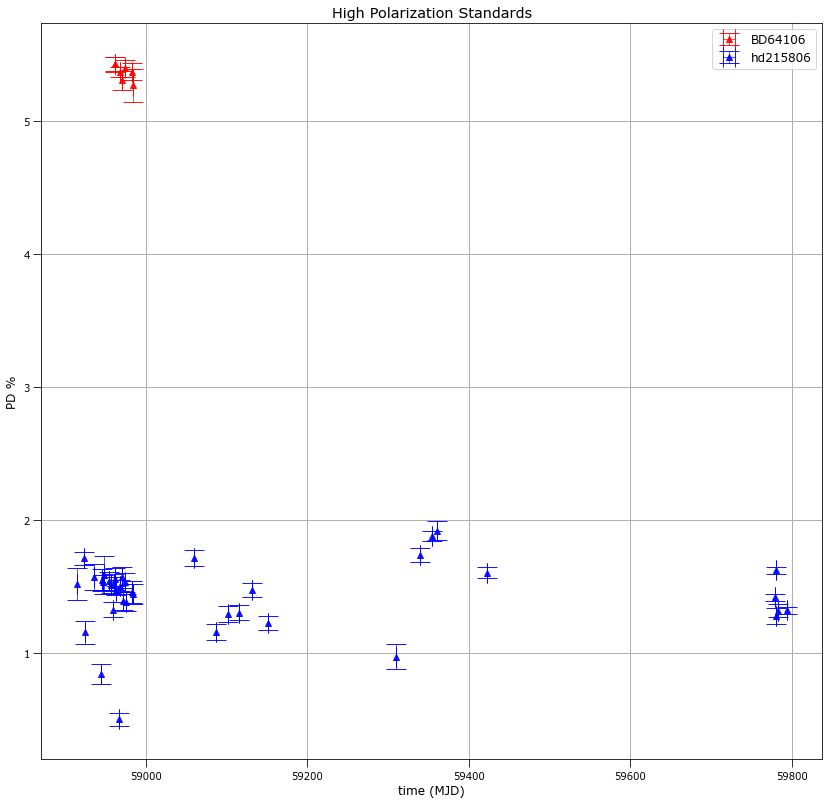

Calculate and plot polarization degree for 3 inputs without returning data.
Data 1 has length 6
Data 2 has length 10
Data 3 has length 38


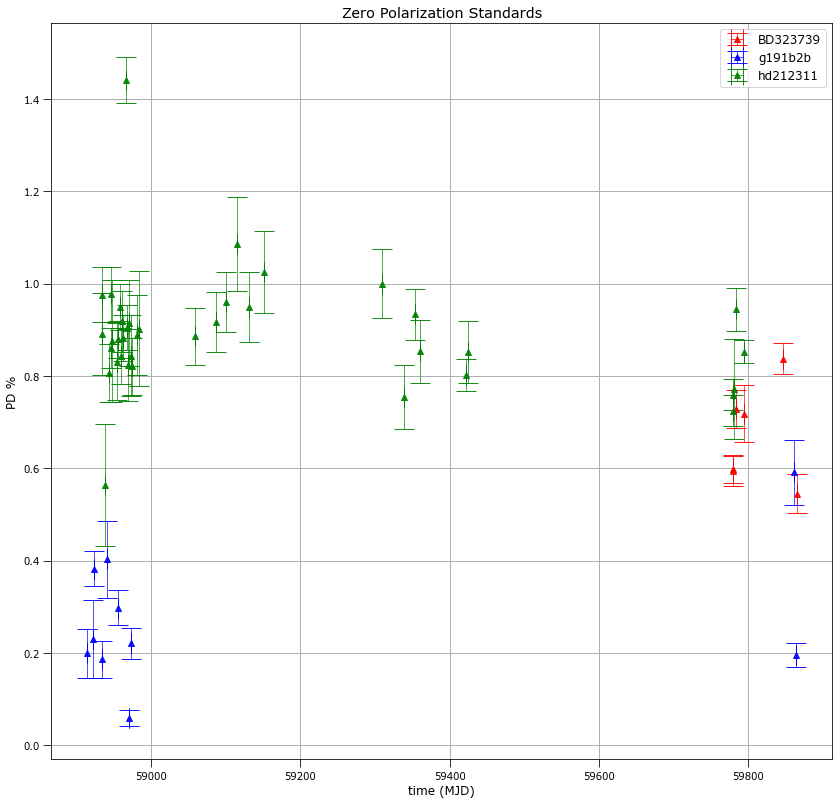

In [209]:
funcs_polarimetry.calc_pd2([np.array(data_bd64106),
                            np.array(data_hd215806)],
                           plot_legend=['BD64106', 
                                        'hd215806'],
                           plot_title='High Polarization Standards',
                           sv_pold_img='./imgs/HighPoloPDs',
                           perc_arg=True, 
                           verbose_calc_pd=False,
                           verbose_data=False)

funcs_polarimetry.calc_pd2([np.array(data_323739),
                            np.array(data_g191b2b),
                            np.array(data_hd212311)],
                           plot_legend=['BD323739', 
                                        'g191b2b',
                                        'hd212311'],
                           plot_title='Zero Polarization Standards',
                           sv_pold_img='./imgs/ZeroPoloPDs',
                           perc_arg=True, 
                           verbose_calc_pd=False,
                           verbose_data=False)

In [ ]:
#All zero pols combined

zpolcombine = [np.concatenate((data_hd212311[0], data_g191[0]), axis=0), 
            np.concatenate((data_hd212311[1], data_g191[1]), axis=0)]

zpolcombnew = [np.concatenate((zpolcombine[0], data_BD323739[0]), axis=0), 
                np.concatenate((zpolcombine[1], data_BD323739[1]), axis=0)]

#High pols combined
hpolcombine = [np.concatenate((data_BD64106[0], data_hd2158[0]), axis=0), 
               np.concatenate((data_BD64106[1], data_hd2158[1]), axis=0)]

In [ ]:
#All zero pols combined

zpolcombine = [np.concatenate((data_hd212311[0], data_g191[0]), axis=0), 
            np.concatenate((data_hd212311[1], data_g191[1]), axis=0)]

zpolcombnew = [np.concatenate((zpolcombine[0], data_BD323739[0]), axis=0), 
                np.concatenate((zpolcombine[1], data_BD323739[1]), axis=0)]

#High pols combined
hpolcombine = [np.concatenate((data_BD64106[0], data_hd2158[0]), axis=0), 
               np.concatenate((data_BD64106[1], data_hd2158[1]), axis=0)]

In [85]:
df

,q,q_uncertainty,u,u_uncertainty,v,v_uncertainty,PD,PD_uncertainty,PA,PA_uncertainty,ignora_a,ignore_b,MJD,half observation duration in days
0,0.013324,0.003210,0.024706,0.003238,0.015919,0.006637,0.027885,0.003231,30.831164,3.304439,1.0,12,56877.633195,0.010468
1,0.003800,0.003890,0.035716,0.003878,-0.017485,0.007927,0.035707,0.003878,41.963806,3.120703,1.0,12,56895.790987,0.037088
2,0.003264,0.003897,0.030100,0.003737,-0.016162,0.008113,0.030026,0.003739,41.905627,3.713348,1.0,12,56896.742816,0.136423
3,-0.002561,0.003402,0.023123,0.003410,-0.020840,0.007065,0.023016,0.003410,48.159869,4.233437,1.0,12,56897.576297,0.012424
4,-0.000471,0.002803,0.027231,0.002814,-0.013913,0.005816,0.027091,0.002814,45.494970,2.963664,2.0,12,56897.791977,0.046319
5,0.003860,0.001106,0.020674,0.001112,0.000686,0.002292,0.021002,0.001112,39.711959,1.509116,1.0,12,56903.773108,0.041371
6,0.004395,0.000988,0.021533,0.000966,-0.001946,0.002435,0.021955,0.000966,39.232431,1.287484,1.0,12,56904.774745,0.046973
7,0.002000,0.000867,0.022516,0.000871,0.005024,0.001786,0.022588,0.000871,42.461907,1.099272,1.0,12,56905.775731,0.049658
8,0.005390,0.001311,0.021061,0.001313,0.003346,0.002731,0.021700,0.001313,37.822790,1.731316,1.0,12,56919.773536,0.015624
9,0.003015,0.001117,0.021938,0.001125,0.000291,0.002325,0.022116,0.001125,41.087975,1.447392,1.0,12,56920.745668,0.038940


In [68]:
#df

In [169]:
#But these all belong to different MJDs
#These can be shifted into q and u
eecep_PD_2014 = ([x*100 for x in df['PD']],[y*100 for y in df['PD_uncertainty']],  np.array([datetime.datetime.fromtimestamp(Time(g, format='mjd').unix)for g in df['MJD']] ))
eecep_PA_2014 = ([x for x in df['PA']],[y for y in df['PA_uncertainty']],  np.array([datetime.datetime.fromtimestamp(Time(g, format='mjd').unix)for g in df['MJD']] ))

for ind in df.index:
    #print(df['q'][ind], df['q_uncertainty'][ind], df['u'][ind], df['u_uncertainty'][ind],df['MJD'][ind] )
    t = Time(df['MJD'][ind], format='mjd')
    datetime_obj = datetime.datetime.fromtimestamp(t.unix)
    #print(ind, t.strftime('%Y-%m-%d %H:%M:%S'), df['MJD'][ind], type(t), (datetime_obj))

In [179]:
combinedPD = [  eecep_PD_2014[0]+data_PD_eecep[0],
                eecep_PD_2014[1]+data_PD_eecep[1],
                np.concatenate((  eecep_PD_2014[2],data_PD_eecep[2]  ), axis=0 )]

combinedPA = [  eecep_PA_2014[0]+data_PA_eecep[0],
                eecep_PA_2014[1]+data_PA_eecep[1],
                np.concatenate((  eecep_PA_2014[2],data_PA_eecep[2]  ), axis=0 )]

Loading Default light curve
Phase Shift:
Loading Default light curve
Phase Shift:


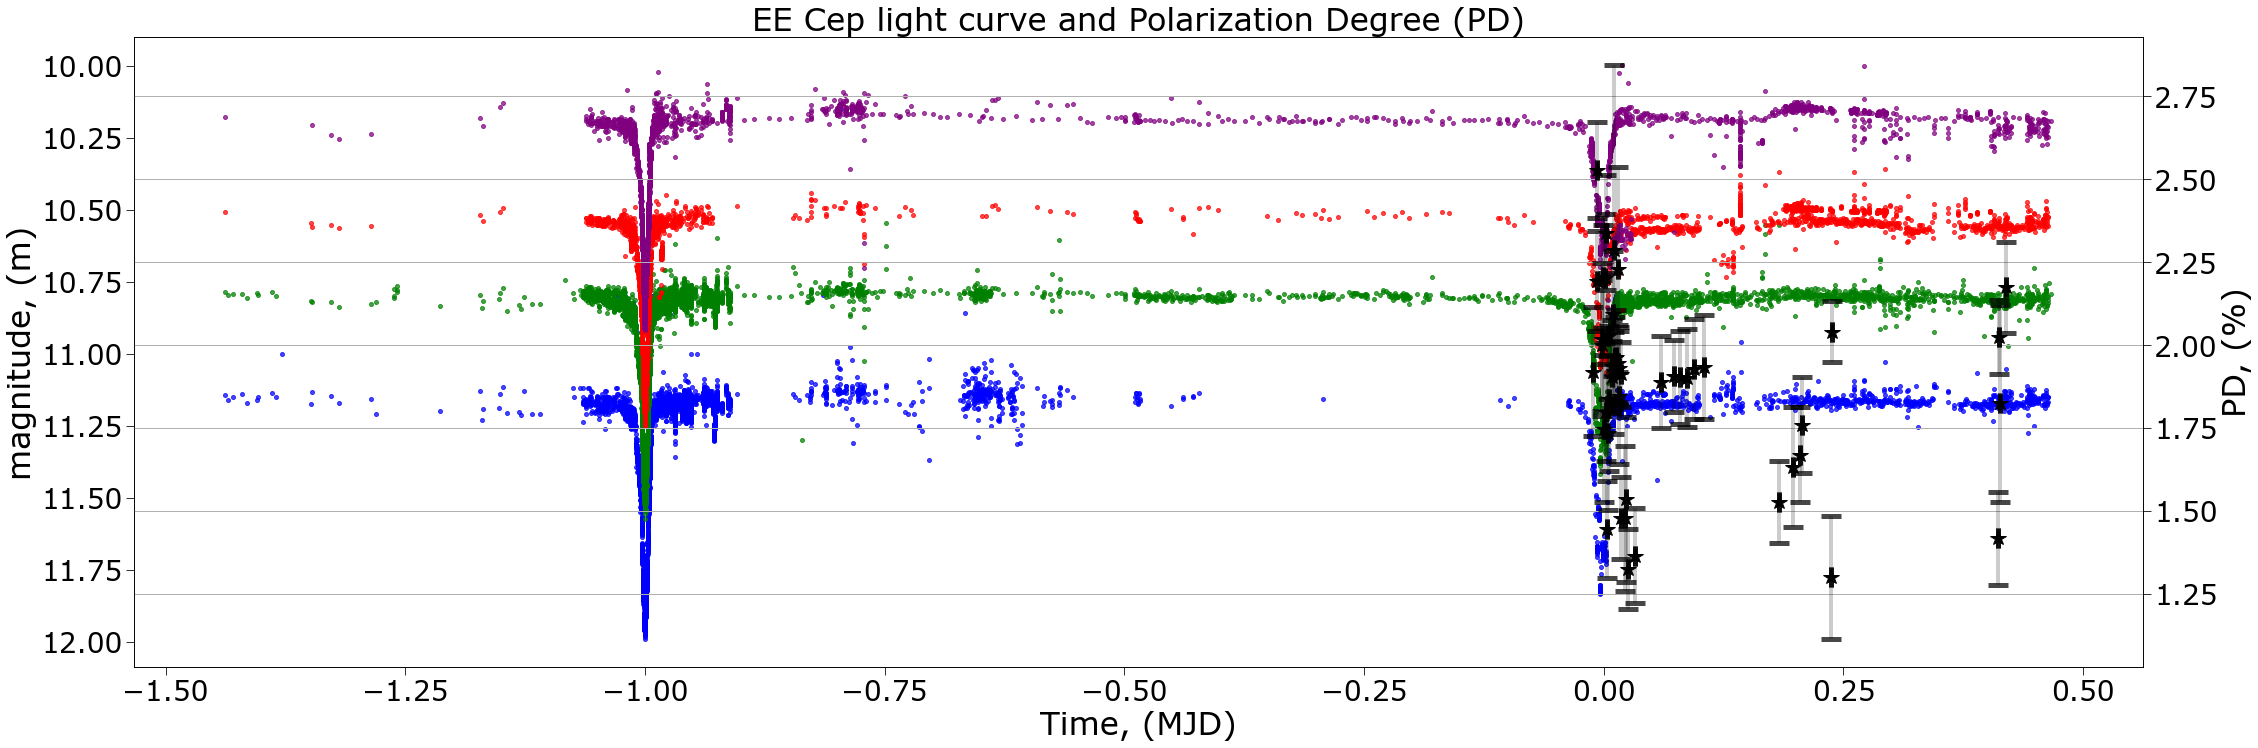

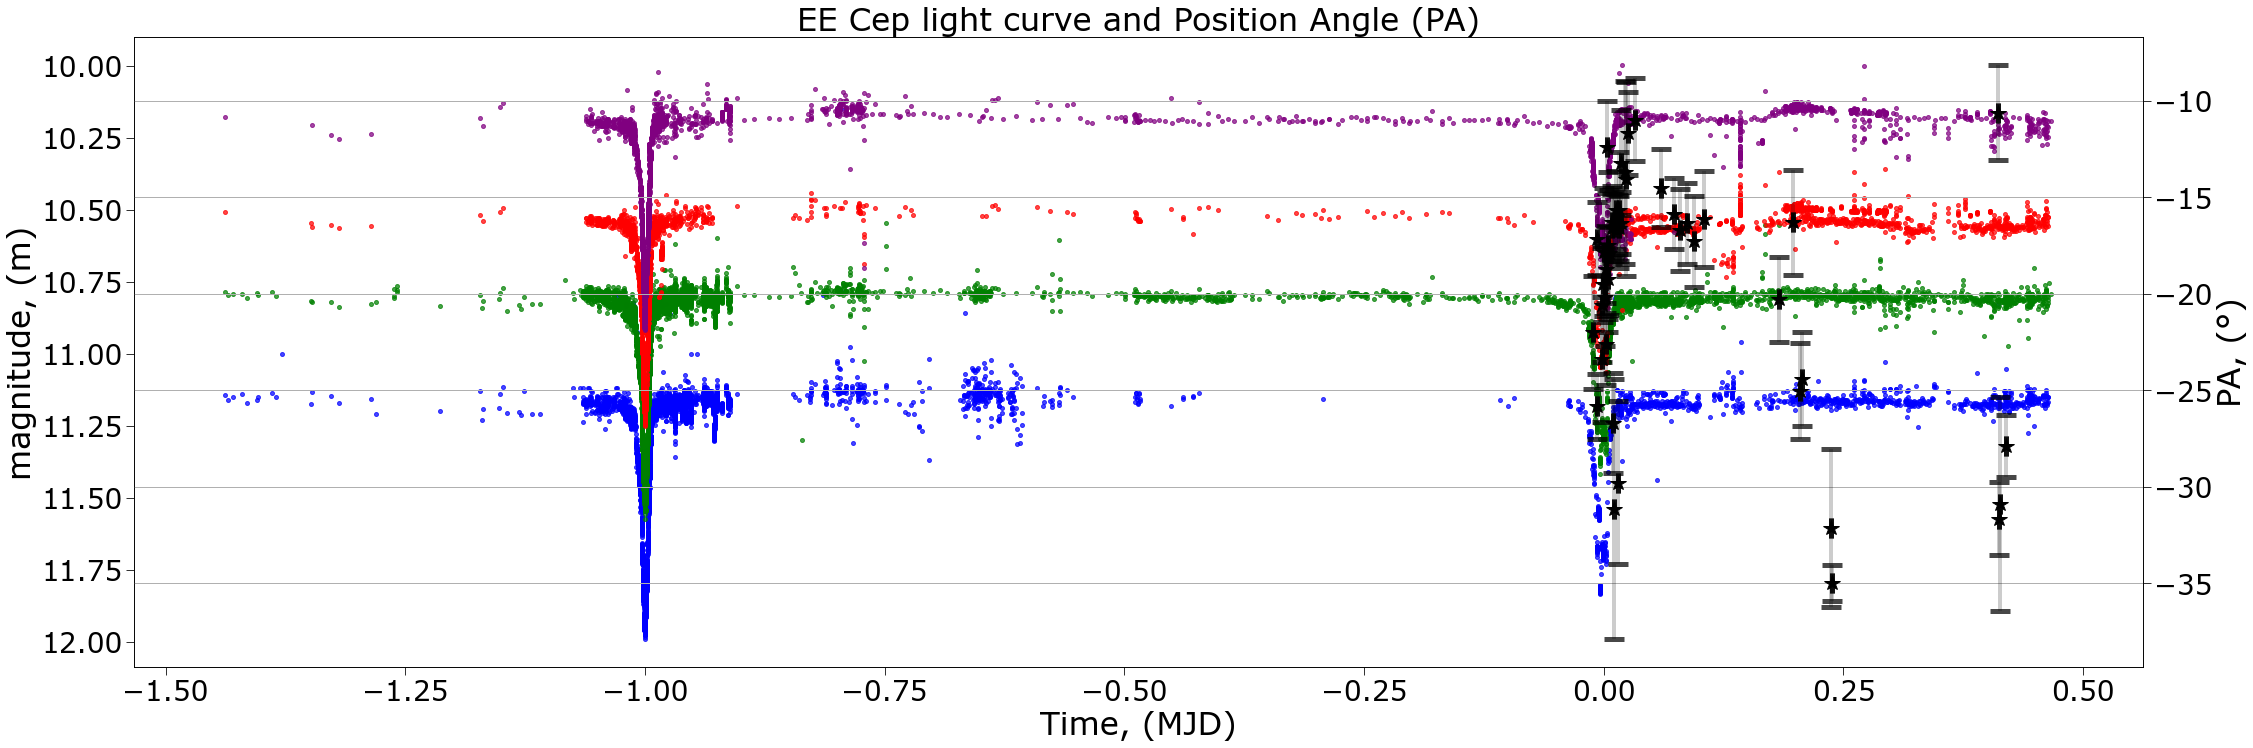

In [190]:
funcs_light_curve_cleaned.EECep_light_curve_superposed(data_PD_eecep,
                                              [], 
                                              (56000, 59900),
                                              txt_arg='PD',
                                              phase_plot=True)

funcs_light_curve_cleaned.EECep_light_curve_superposed(data_PA_eecep,
                                              [], 
                                              (56000, 59900),
                                              txt_arg='PA',
                                              phase_plot=True)

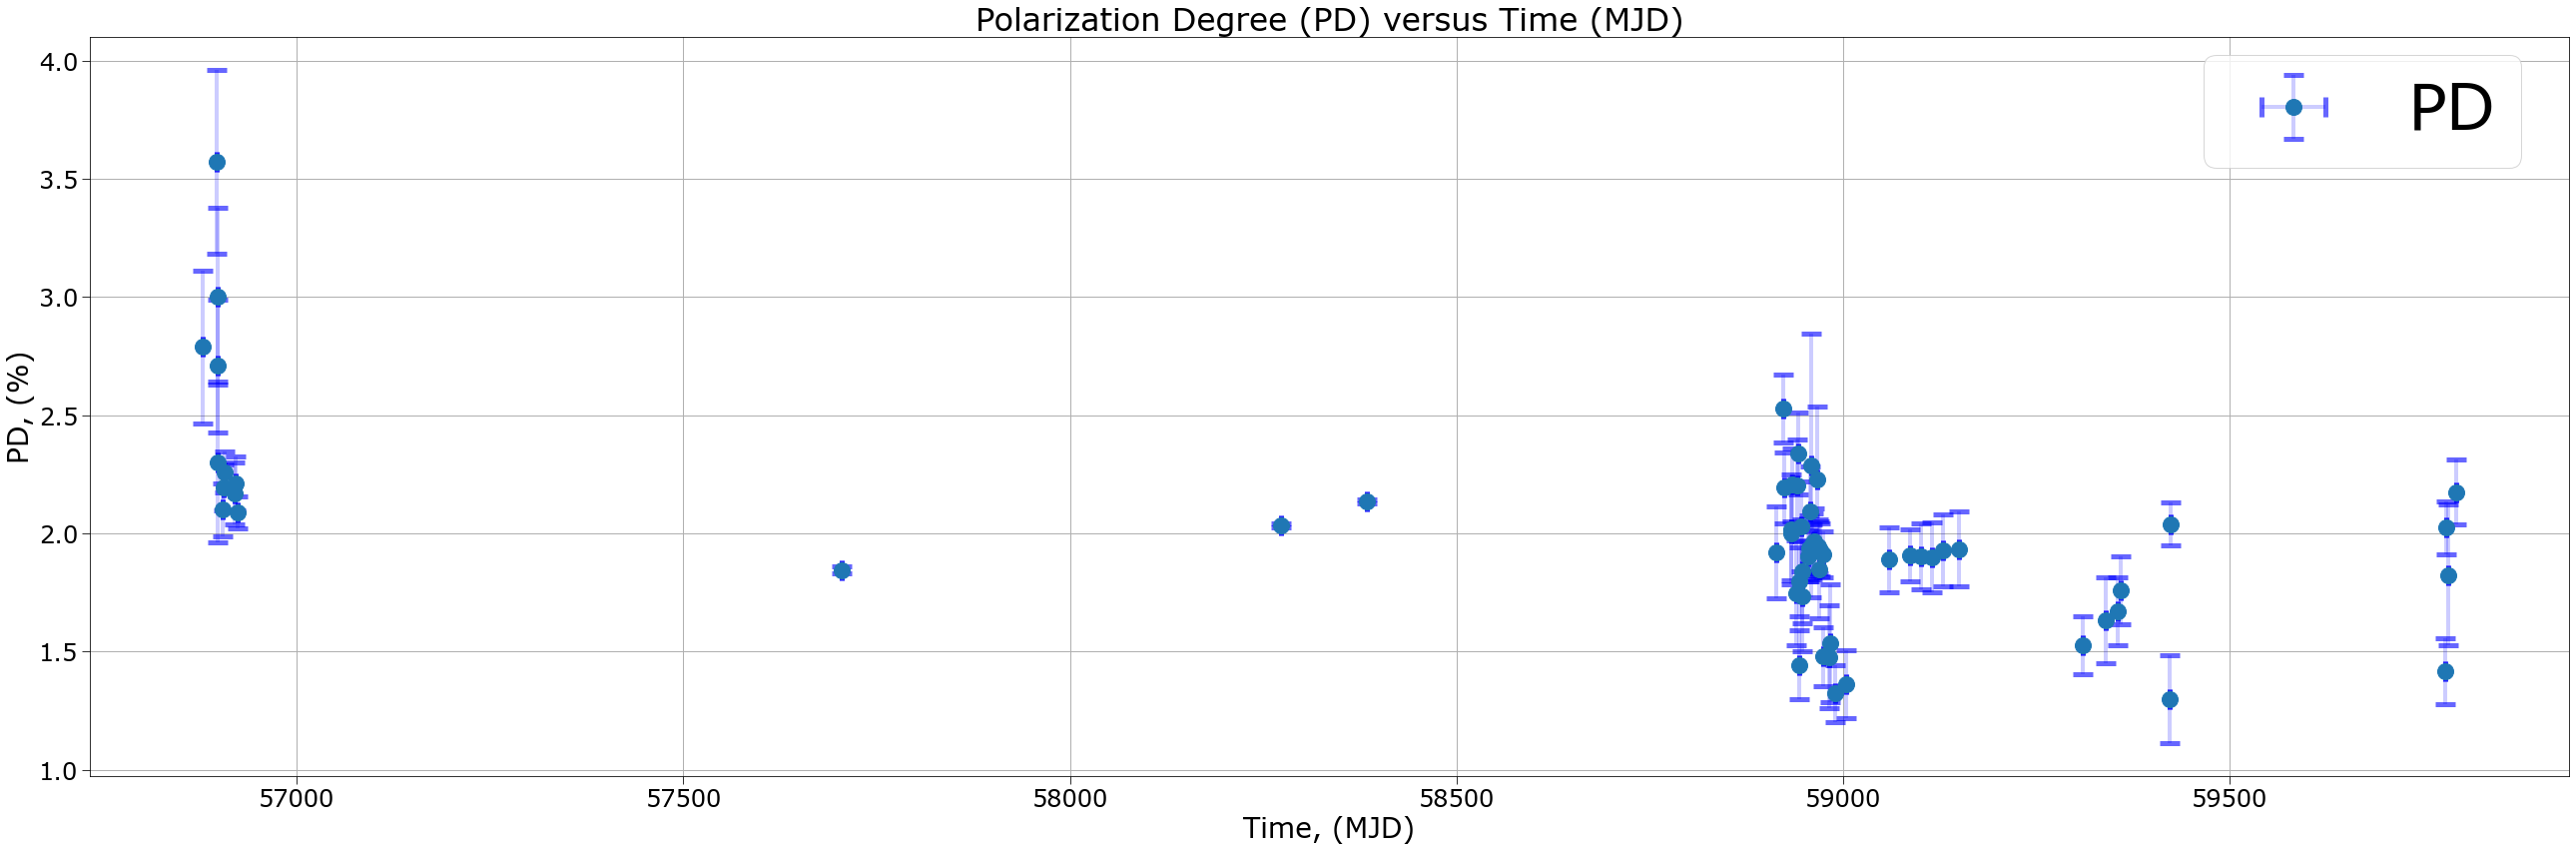

Loading Default light curve


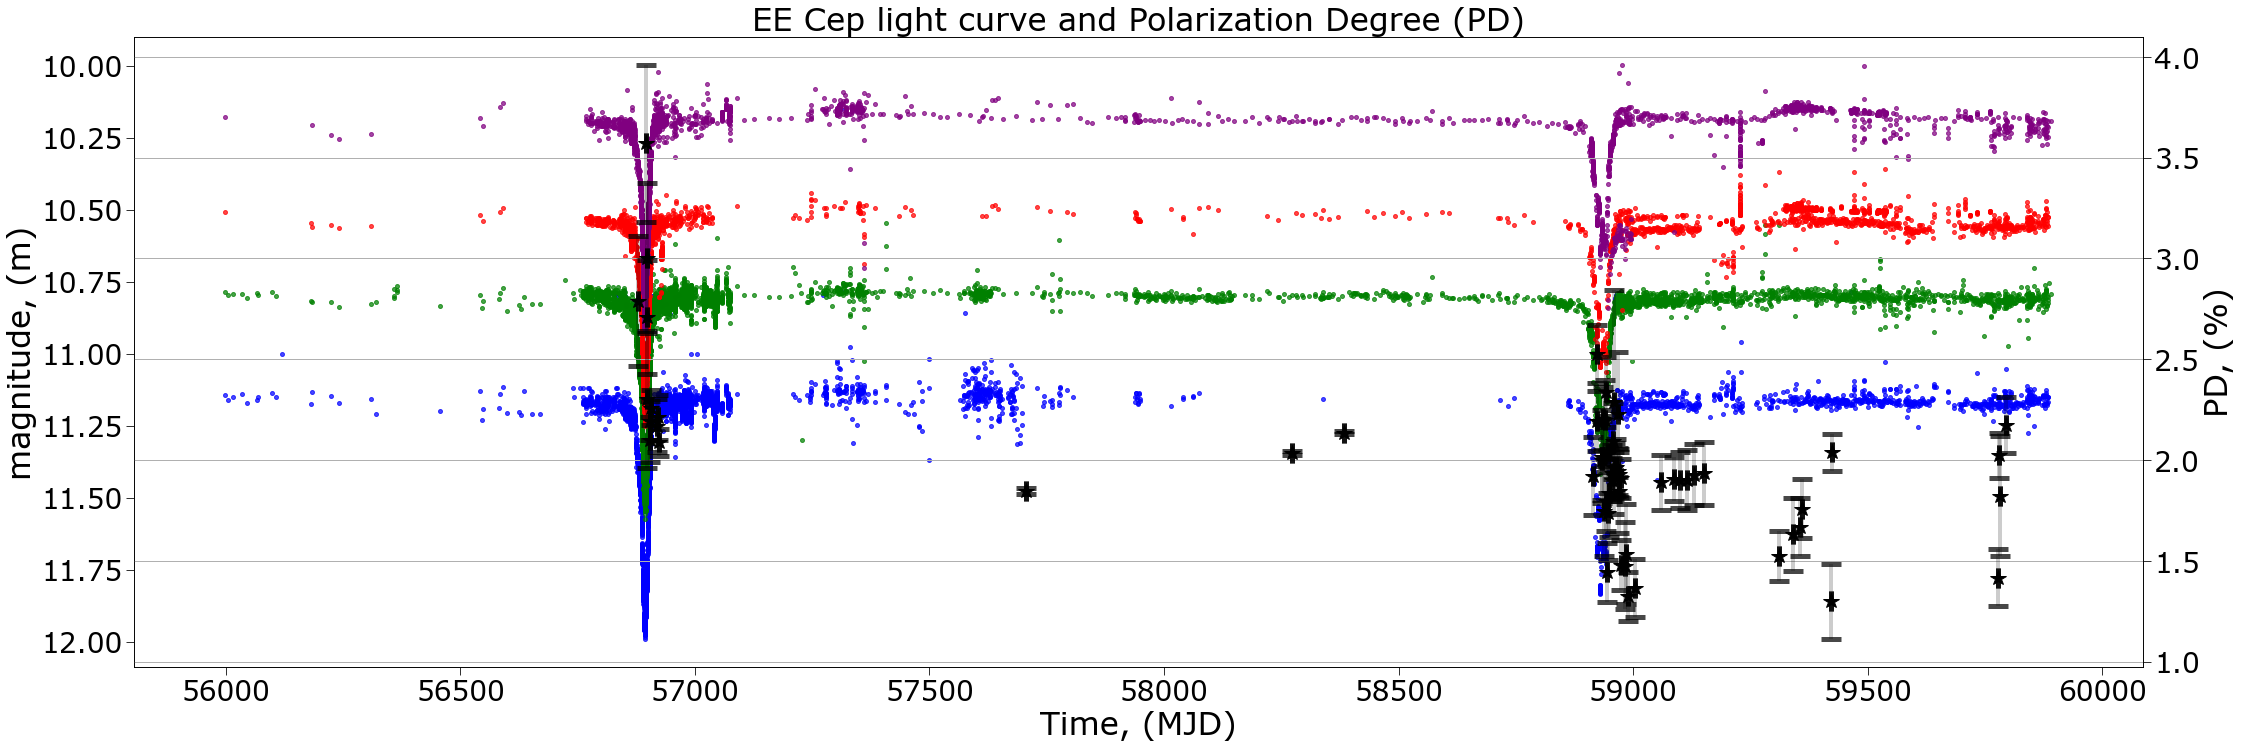

In [167]:
funcs_polarimetry.plot_pol_stab(combinedPD[2], combinedPD[0], combinedPD [1],
                                plot_data='PD', toggle=False)

funcs_light_curve_cleaned.EECep_light_curve_superposed(combinedPD,
                                              [], 
                                              (56000, 59900),
                                              txt_arg='PD',
                                              phase_plot=False)

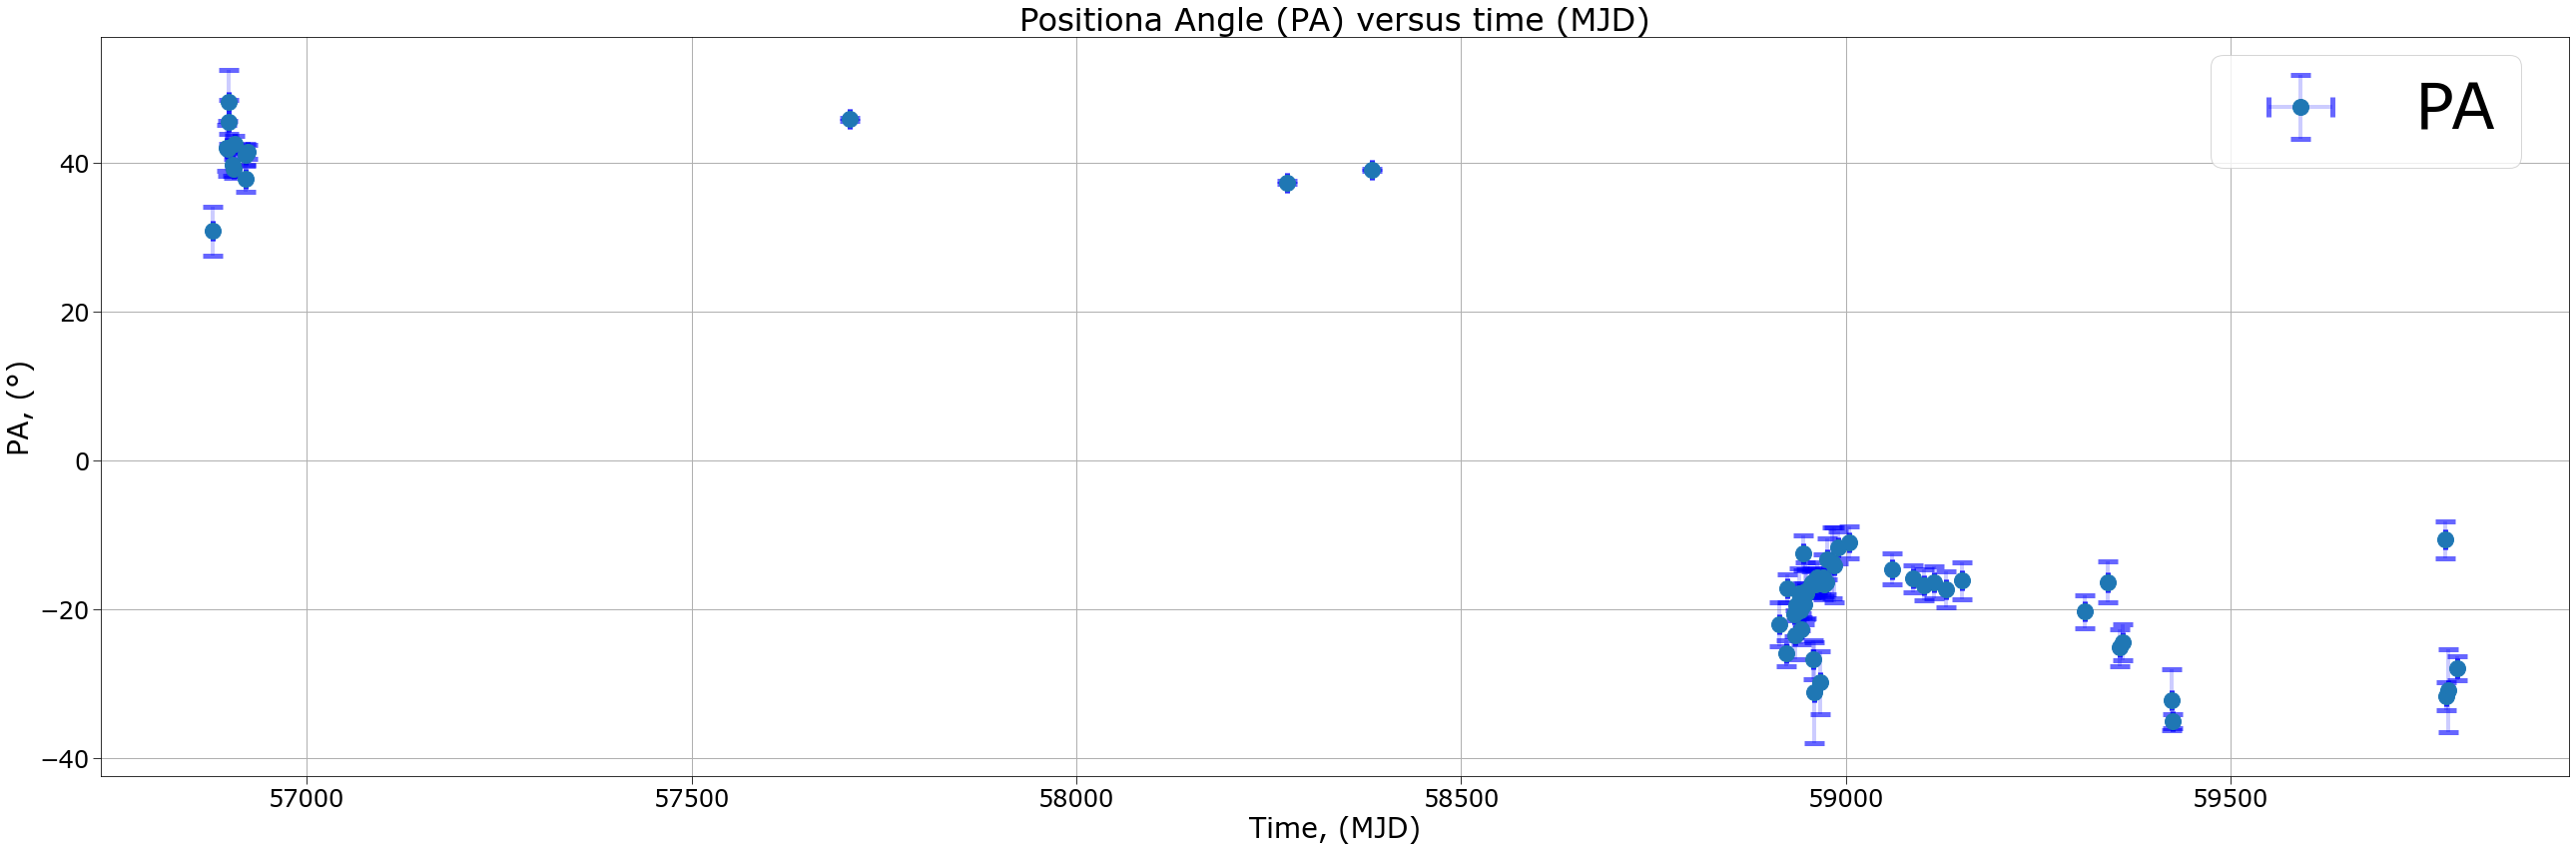

Loading Default light curve


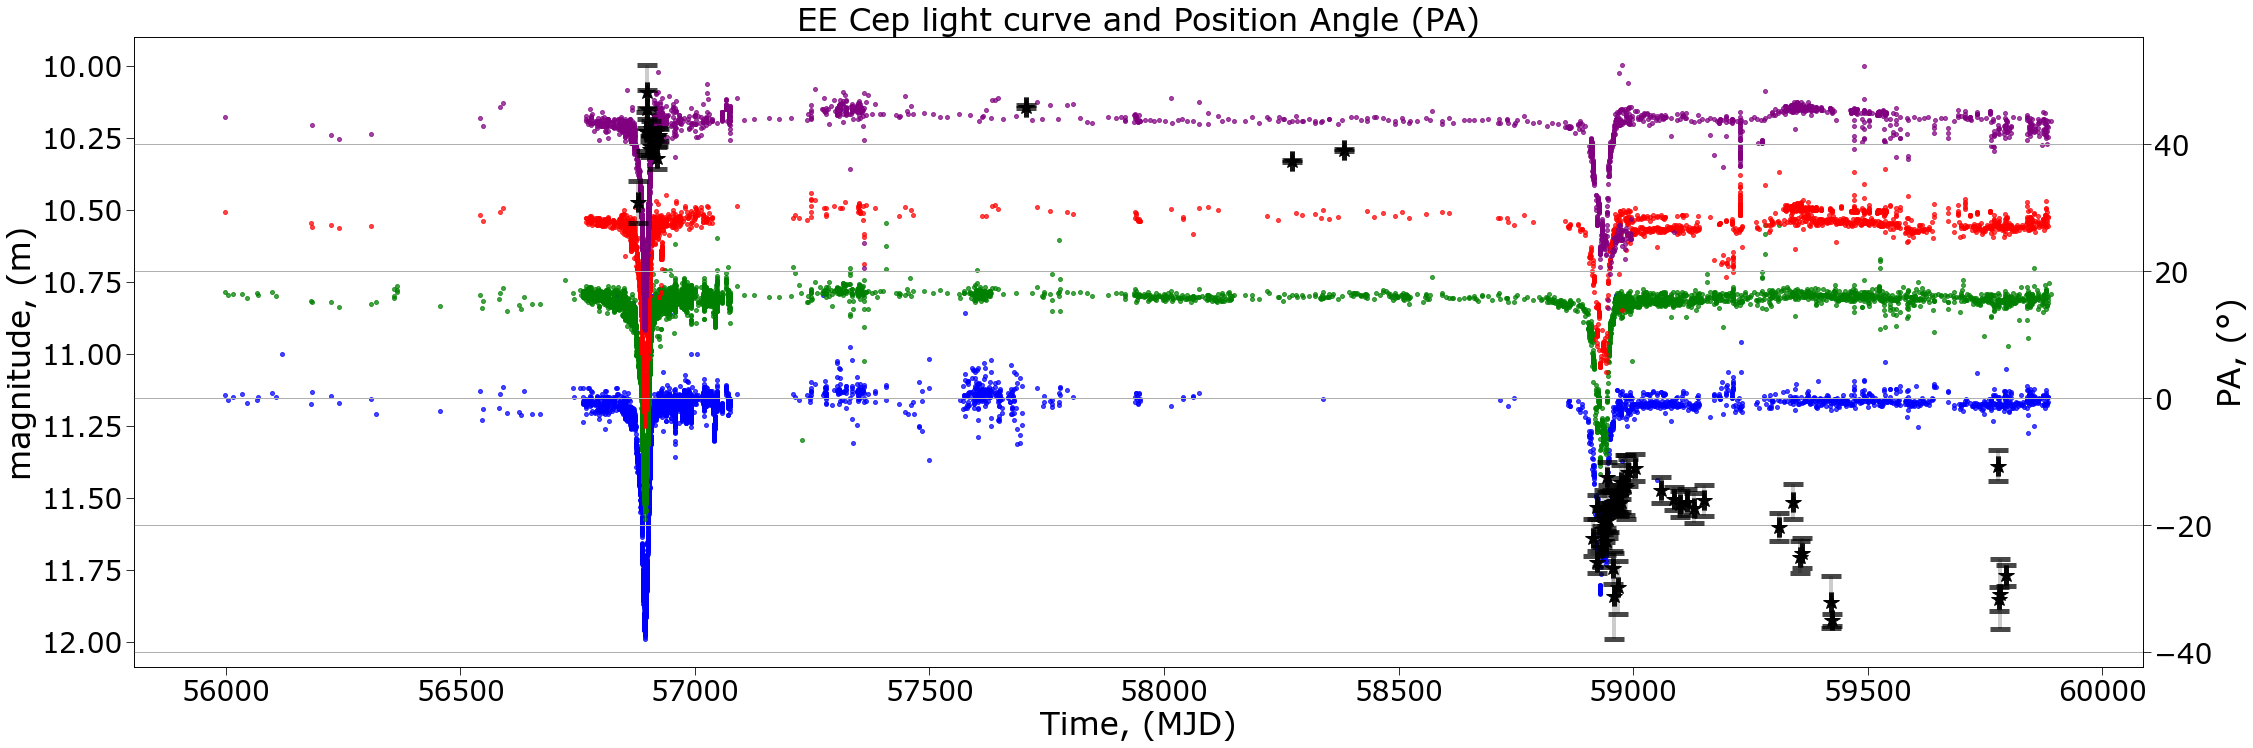

In [171]:
funcs_polarimetry.plot_pol_stab(combinedPA[2], combinedPA[0], combinedPA[1],
                                plot_data='PA', toggle=False)

funcs_light_curve_cleaned.EECep_light_curve_superposed(combinedPA,
                                              [], 
                                              (56000, 59900),
                                              txt_arg='PA',
                                              phase_plot=False)

In [116]:
#List of dimension 2
#First list is a list of dictionaries

#The dictionaries are arranged as dict key: {[q], [q error], [u], [uerror]}
#len(data_EECep[0])
#np.array(data_EECep)[0][0]
#data_EECep[1]